In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df_categorical=df.loc[:,df.dtypes== object]
df_categorical

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [11]:
df_numerical = df.select_dtypes(exclude=[object])
df_numerical

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [9]:
df.shape

(614, 13)

# Data Cleaning
Checking the Missing Values

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df_categorical.isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [14]:
df_numerical.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [16]:
x_na=[x for x in df.columns if df[x].isnull().sum()>1]

In [18]:
## 2- step print the feature name and the percentage of missing values
for x in x_na:
    print(x, np.round(df[x].isnull().mean(), 4),  ' % missing values')

Gender 0.0212  % missing values
Married 0.0049  % missing values
Dependents 0.0244  % missing values
Self_Employed 0.0521  % missing values
LoanAmount 0.0358  % missing values
Loan_Amount_Term 0.0228  % missing values
Credit_History 0.0814  % missing values


In [19]:
###very minute null values,noo need to drop any columns

<AxesSubplot:>

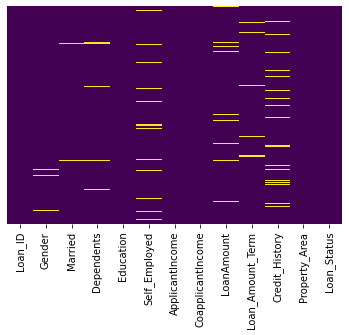

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [22]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [23]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# Let's confirm if there are any missing values in 'LoanAmount' & 'Credit_History'

In [24]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# or we can simply drop all those null values by dropna()

In [25]:
##Now, Let's drop all the missing values remaining.Let's check the Missing values for the final time

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#Here, we have dropped all the missing values to avoid disturbances in the model. 
##the Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

# Now, Let's check the final Dataset Shape

In [30]:
#now the rows are reduced as the missing values are dropped

In [31]:
df.shape

(542, 13)

# Exploratory Data Analyis

In [33]:
#Comparison between Parameters in getting the Loan:

In [1]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])



NameError: name 'plt' is not defined

# Let's replace the Variable values to Numerical form & display the Value Counts

In [37]:
#The data in Numerical form avoids disturbances in building the model.

In [38]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [39]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [40]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()## 2- step print the feature name and the percentage of missing values
for x in x_na:
    print(x, np.round(df[x].isnull().mean(), 4),  ' % missing values')

1    444
0     98
Name: Gender, dtype: int64

In [41]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [42]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [43]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [44]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [45]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [46]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [47]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [48]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [49]:
ppt=df.corr()
ppt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.354860,0.201013,-0.060067,-0.019980,0.041987,0.159611,0.110581,-0.094465,0.022618,-0.001761,0.031047
Married,0.354860,1.000000,0.364153,-0.012897,-0.012630,0.030757,0.113388,0.157788,-0.115536,0.027905,0.020687,0.107162
Dependents,0.201013,0.364153,1.000000,-0.070886,0.059697,0.113678,-0.023300,0.140333,-0.099785,-0.042867,-0.003589,0.010751
Education,-0.060067,-0.012897,-0.070886,1.000000,0.015456,0.139722,0.074726,0.163719,0.099649,0.052581,0.041436,0.079447
Self_Employed,-0.019980,-0.012630,0.059697,0.015456,1.000000,0.166528,-0.025008,0.131328,-0.029640,-0.027392,-0.041443,-0.023526
ApplicantIncome,0.041987,0.030757,0.113678,0.139722,0.166528,1.000000,-0.103427,0.510678,0.002677,-0.052919,-0.053146,-0.044812
CoapplicantIncome,0.159611,0.113388,-0.023300,0.074726,-0.025008,-0.103427,1.000000,0.191007,-0.010942,0.000103,0.000742,-0.040495
LoanAmount,0.110581,0.157788,0.140333,0.163719,0.131328,0.510678,0.191007,1.000000,0.075725,-0.033180,-0.075312,-0.060531
Loan_Amount_Term,-0.094465,-0.115536,-0.099785,0.099649,-0.029640,0.002677,-0.010942,0.075725,1.000000,0.023401,-0.066333,-0.005593
Credit_History,0.022618,0.027905,-0.042867,0.052581,-0.027392,-0.052919,0.000103,-0.033180,0.023401,1.000000,0.000329,0.516853


In [50]:
#From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable).
#Which denotes that the Loan_Status is heavily dependent on the Credit_History.(51%)

# Final DataFrame

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Importing Packages for Classification algorithms

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the data into Train and Test set

In [53]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Logistic Regression (LR)
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc

# Training and Predicting

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
accuracy=confusion_matrix(y_test,predictions)

In [60]:
accuracy

array([[ 24,  33],
       [  2, 104]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy=accuracy_score(y_test,predictions)
accuracy


0.7852760736196319

In [63]:
predictions

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [64]:
#Let's move on to evaluate our model!

# Evaluation

In [65]:
#We can check precision,recall,f1-score using classification report!

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.42      0.58        57
           1       0.76      0.98      0.86       106

    accuracy                           0.79       163
   macro avg       0.84      0.70      0.72       163
weighted avg       0.82      0.79      0.76       163



# CONCLUSION:

The Loan Status is heavily dependent on the Credit History for Predictions.
The Logistic Regression algorithm gives us the maximum Accuracy (79% approx)